In [1]:
## **Load the cleaned dataset** 
## **Load the cleaned dataset** 🔃

In [2]:
!pip install yellowbrick --quiet

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_dataset.csv')

In [4]:
df.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,Power
0,1.0,-0.947770,-0.944225,0.272686,0.235748,-1.703463,0.0,0.626122
1,0.0,-0.897715,-0.876822,-0.838095,0.631532,-1.656112,0.0,0.494763
2,0.0,-0.947770,-1.011628,-0.139002,0.982082,-1.624544,0.0,1.465392
3,0.0,-0.897715,-0.944225,-0.643902,-0.137419,-1.592977,0.0,-0.451200
4,0.0,-0.897715,-0.876822,-0.838095,-0.080878,-1.561409,0.0,-0.482431


## **Clustering**

In [5]:
# features to use for clustering
X = df[["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"]]

* Partitional Clustering, **K-means algorithm**

Elbow method to determine the optimal number (k) of clusters

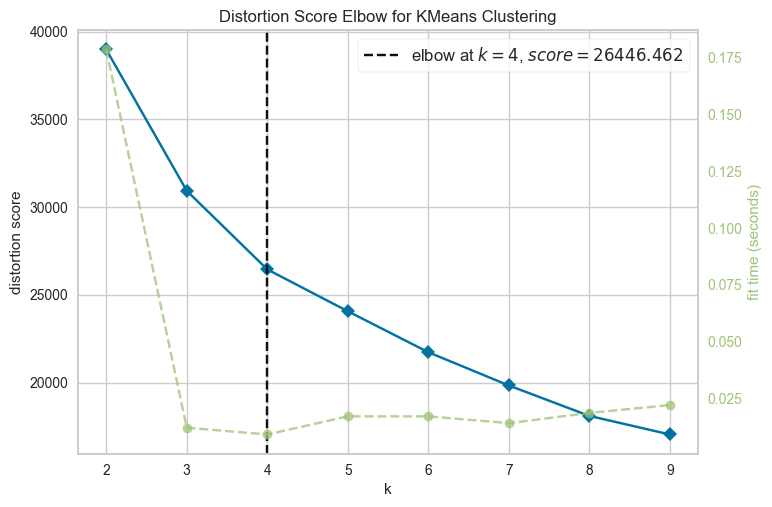

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

#K-means Clustering 
model = KMeans()

visualizer = KElbowVisualizer(model,k = (2,10)) #it turns out to be k = 4 is optimal

visualizer.fit(X)
visualizer.show()

In [7]:
kmeans = KMeans(init= "random",n_clusters = 4, n_init = 10, max_iter = 300,random_state = 42)

kmeans.fit(X)
df["kmeans_cluster"] = kmeans.predict(X)

Plot the results

<Figure size 1000x800 with 0 Axes>

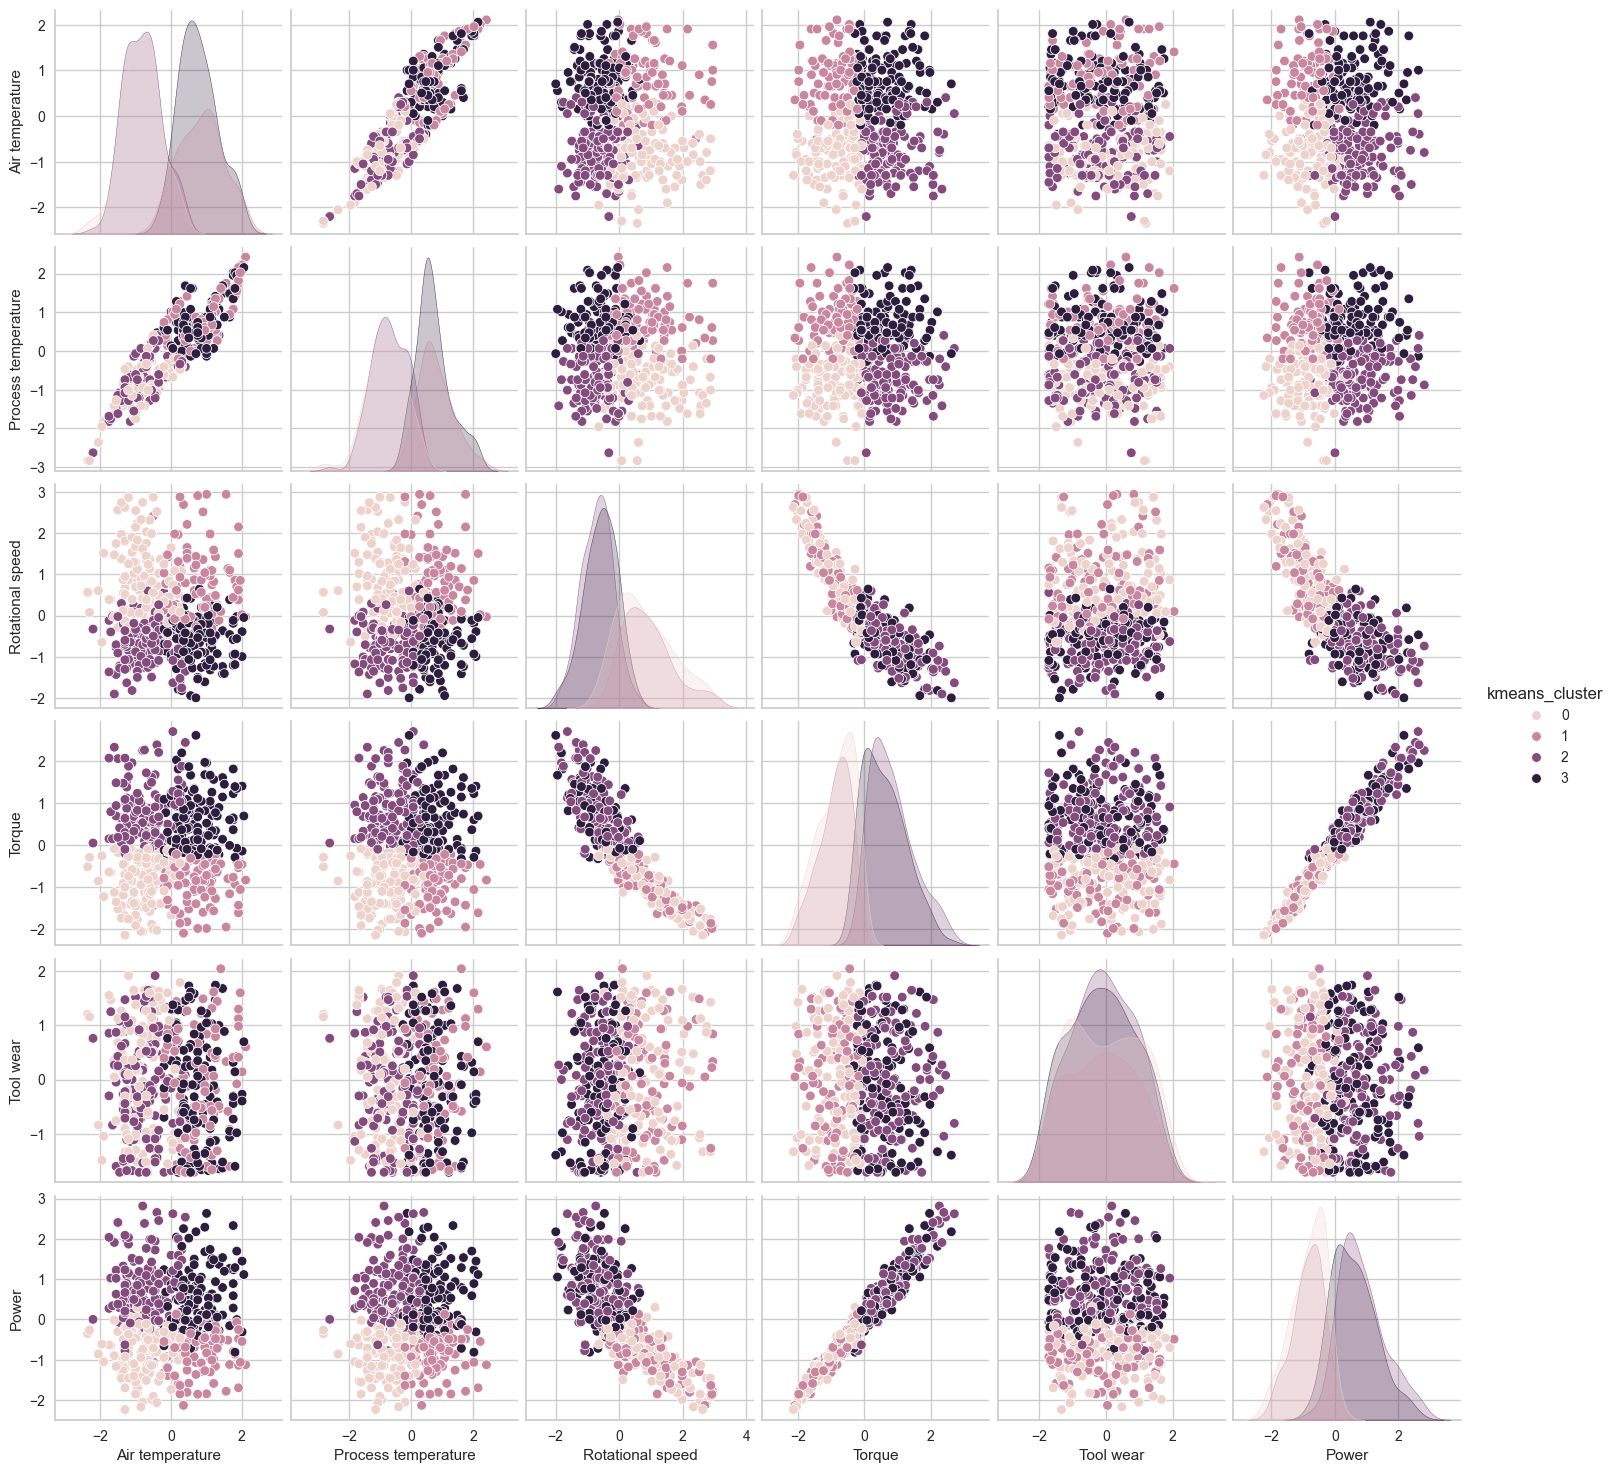

In [8]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="kmeans_cluster", vars=["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"])
plt.show()

In [9]:
# Silhouette coefficient for k-means algorithm
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, kmeans.predict(X))

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.225


Hierarchical clustering, Agglomerative

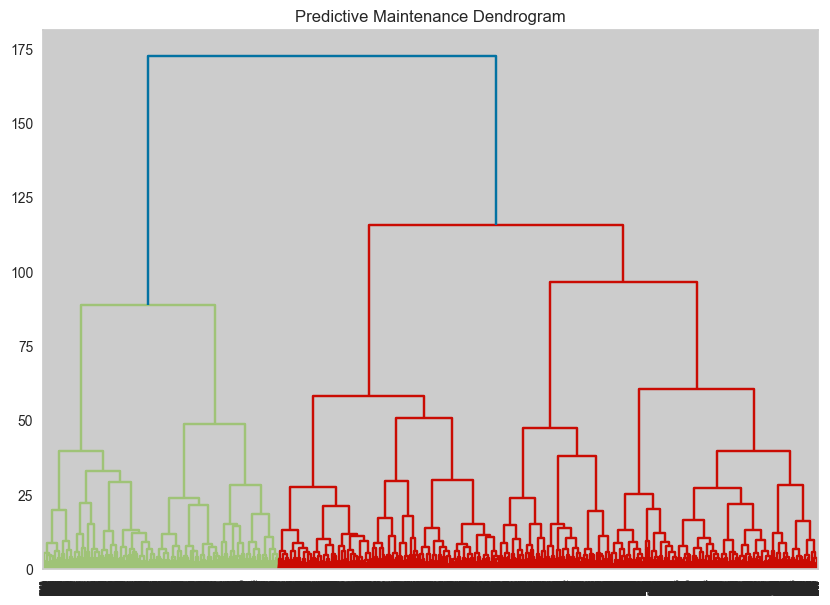

In [10]:
import scipy.cluster.hierarchy as shc

# plot dendogram
plt.figure(figsize=(10, 7))
plt.title("Predictive Maintenance Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(X, method='ward', metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering

# Hierarchical clustering
model = AgglomerativeClustering(n_clusters=3,  linkage='ward')
model.fit(X)
df["hierarchical_cluster"] = model.labels_

In [12]:
# Silhouette coefficient for Agglomerative clustering algorithm
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, df["hierarchical_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.180


* Density-based clustering, **DBSACN**

Determining EPS and MinPts for DBSACN algorithm

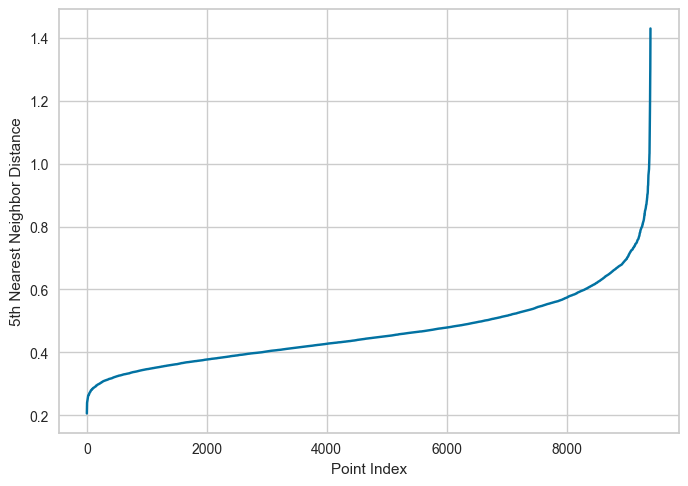

In [13]:
from sklearn.neighbors import NearestNeighbors

k  = 5

#Create the nearest Neighbors Model

nn = NearestNeighbors(n_neighbors = k)
nn.fit(X)

#get the distances and inces of the kth nearest neighbors
distances , indices = nn.kneighbors(X)

# get the kth nearest neighbor distances for each point
kth_distances = distances[:, k-1]

#get the kth nearest distnces forn each point 
kth_distances_sorted = np.sort(kth_distances)

plt.plot(kth_distances_sorted)
plt.xlabel('Point Index')
plt.ylabel('5th Nearest Neighbor Distance')
plt.show()

In [14]:
from sklearn.cluster import DBSCAN

# create a DBSCAN model
model = DBSCAN(eps=0.7, min_samples=5)
model.fit(X)

# obtain the cluster labels
df['dbscan_cluster'] = model.labels_

In [15]:
from sklearn.metrics import silhouette_score

# calculate the silhouette coefficient
score = silhouette_score(X, df["dbscan_cluster"])

print(f"Silhouette Coefficient: {score:.3f}")

Silhouette Coefficient: 0.292


Plot the results

<Figure size 1000x800 with 0 Axes>

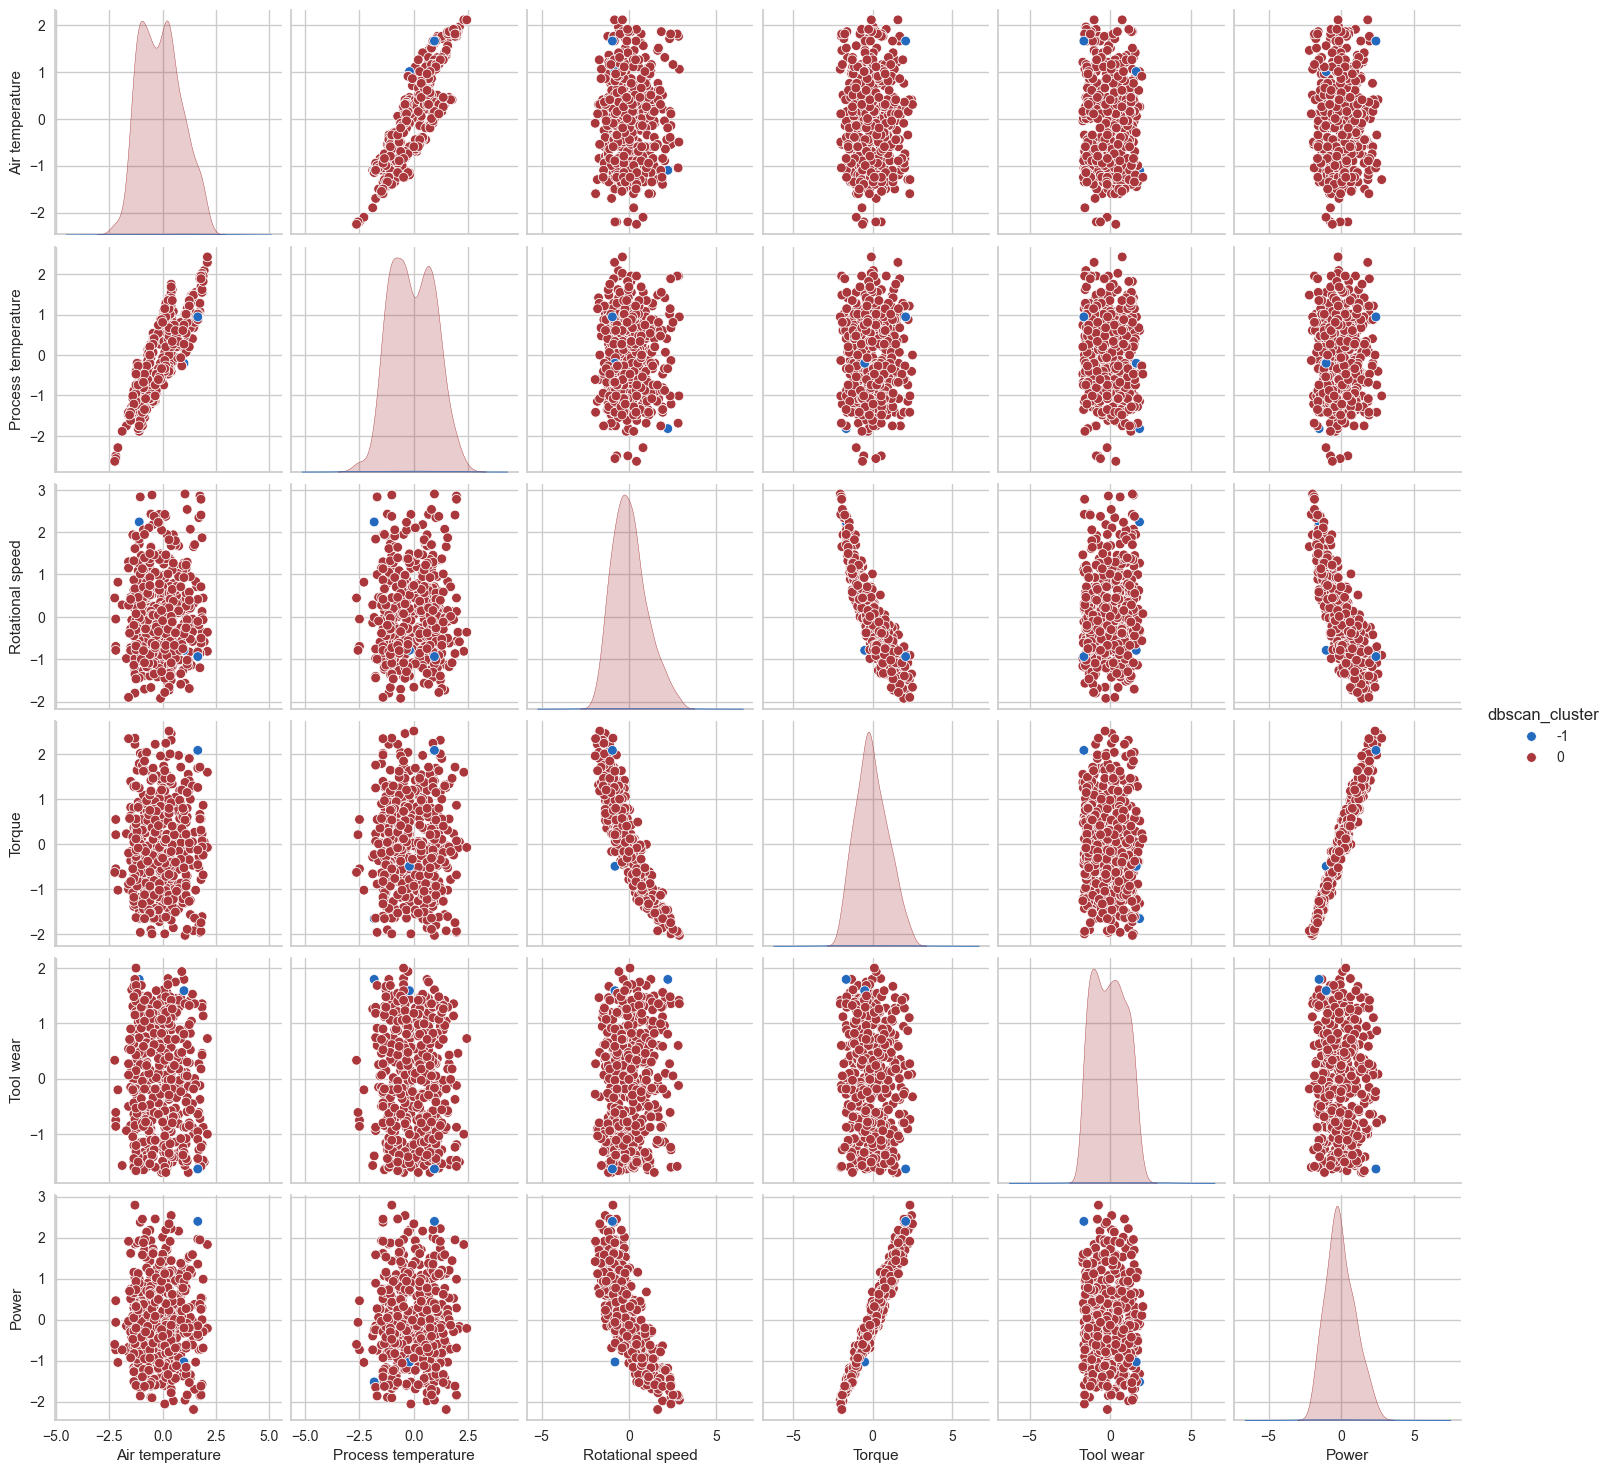

In [16]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="dbscan_cluster", palette="vlag", vars=["Air temperature", "Process temperature", "Rotational speed", "Torque", "Tool wear", "Power"])
plt.show()